In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset

* `Vmag` - Visual Apparent Magnitude of the Star
* `Plx` - Distance Between the Star and the Earth
* `e_Plx` - Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)
* `B-V` - B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)
* `SpType` - Stellar classification. (Roman Numerals >IV are giants. Otherwise are dwarfs)

In [2]:
# Use pd.read_csv to read file
path = "Star99999_raw.csv"
star_raw_data = pd.read_csv(path)

star_raw_data

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...,...
99994,99994,8.72,3.07,0.87,0.097,B3
99995,99995,9.25,,,0.131,A1V
99996,99996,8.08,1.07,0.68,1.094,G5
99997,99997,6.98,2.97,0.76,-0.143,B1.5V


# Pre-Processing the data

In [3]:
# Check the DataType of our dataset
star_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [4]:
# Convert Columns data type to float values
star_raw_data["Vmag"] = pd.to_numeric(star_raw_data["Vmag"], downcast="float", errors='coerce')
star_raw_data["Plx"] = pd.to_numeric(star_raw_data["Plx"], downcast="float", errors='coerce')
star_raw_data["e_Plx"] = pd.to_numeric(star_raw_data["e_Plx"], downcast="float", errors='coerce')
star_raw_data["B-V"] = pd.to_numeric(star_raw_data["B-V"], downcast="float", errors='coerce')
star_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99999 non-null  int64  
 1   Vmag        99998 non-null  float32
 2   Plx         99768 non-null  float32
 3   e_Plx       99768 non-null  float32
 4   B-V         98871 non-null  float32
 5   SpType      97377 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
# Check the DataType of our dataset
star_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99999 non-null  int64  
 1   Vmag        99998 non-null  float32
 2   Plx         99768 non-null  float32
 3   e_Plx       99768 non-null  float32
 4   B-V         98871 non-null  float32
 5   SpType      97377 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
star_raw_data

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...,...
99994,99994,8.72,3.07,0.87,0.097,B3
99995,99995,9.25,NaN,NaN,0.131,A1V
99996,99996,8.08,1.07,0.68,1.094,G5
99997,99997,6.98,2.97,0.76,-0.143,B1.5V


In [7]:
star_raw_data.describe(include='all')

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
count,99999.000000,99998.000000,99768.000000,99768.000000,98871.000000,97377
unique,NaN,NaN,NaN,NaN,NaN,3756
top,NaN,NaN,NaN,NaN,NaN,K0
freq,NaN,NaN,NaN,NaN,NaN,7355
mean,49999.000000,8.369750,7.212467,1.365385,0.704726,NaN
std,28867.369122,1.313896,11.348988,1.816838,0.489679,NaN
min,0.000000,-1.440000,-54.950001,0.380000,-0.400000,NaN
25%,24999.500000,7.640000,2.510000,0.880000,0.348000,NaN
50%,49999.000000,8.440000,4.630000,1.100000,0.612000,NaN
75%,74998.500000,9.140000,8.410000,1.390000,1.075000,NaN


In [8]:
# check the number of missing data
star_raw_data.isnull().sum()

Unnamed: 0       0
Vmag             1
Plx            231
e_Plx          231
B-V           1128
SpType        2622
dtype: int64

In [9]:
# remove all the missing data
star_raw_data = star_raw_data.dropna() 
# check the number of missing data
star_raw_data.isnull().sum()

Unnamed: 0    0
Vmag          0
Plx           0
e_Plx         0
B-V           0
SpType        0
dtype: int64

In [10]:
star_raw_data.describe()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V
count,96742.000000,96742.000000,96742.000000,96742.000000,96742.000000
mean,50008.472721,8.291918,7.105242,1.264163,0.700663
std,28877.277238,1.247995,11.145643,1.156202,0.490053
min,0.000000,-1.440000,-35.099998,0.380000,-0.400000
25%,25001.250000,7.610000,2.520000,0.870000,0.342000
50%,49971.500000,8.400000,4.600000,1.080000,0.605000
75%,75034.750000,9.070000,8.270000,1.360000,1.072000
max,99998.000000,13.610000,772.330017,69.070000,5.460000


In [11]:
#Remove unwanted column
star_raw_data = star_raw_data.drop('Unnamed: 0', axis=1)
star_raw_data.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


In [12]:
#Check of the distribution of the target
star_raw_data["SpType"].unique()

array(['F5', 'K3V', 'B9', ..., 'K4II:', 'F7/G0 +F8/G2', 'M2-M7E(S)'],
      dtype=object)

In [13]:
star_raw_data = star_raw_data.reset_index(drop=True)

In [14]:
star_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B-V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


In [15]:
#Save a copy, so I can call it in a easier way
Stars_Data = star_raw_data.copy()
Stars_Data

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96737,7.92,3.93,1.24,0.133,Am...
96738,8.72,3.07,0.87,0.097,B3
96739,8.08,1.07,0.68,1.094,G5
96740,6.98,2.97,0.76,-0.143,B1.5V


In [16]:
#Dropping rows that `Plx` = 0
Stars_Data = Stars_Data[Stars_Data.Plx != 0]

#Reindex the dataframe
Stars_Data = Stars_Data.reset_index(drop=True)

Stars_Data

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...
96703,8.72,3.07,0.87,0.097,B3
96704,8.08,1.07,0.68,1.094,G5
96705,6.98,2.97,0.76,-0.143,B1.5V


In [17]:
#Implement the equation
Stars_Data["Amag"] = Stars_Data["Vmag"] + 5* (np.log10(abs(Stars_Data["Plx"]))+1)

Stars_Data

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.10,3.54,1.39,0.482,F5,16.845016
1,9.27,21.90,3.10,0.999,K3V,20.972221
2,6.61,2.81,0.63,-0.019,B9,13.853531
3,8.06,7.75,0.97,0.370,F0V,17.506508
4,8.55,2.87,1.11,0.902,G8III,15.839410
...,...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...,15.891963
96703,8.72,3.07,0.87,0.097,B3,16.155693
96704,8.08,1.07,0.68,1.094,G5,13.226919
96705,6.98,2.97,0.76,-0.143,B1.5V,14.343782


In [18]:
Stars_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96707 non-null  float32
 1   Plx     96707 non-null  float32
 2   e_Plx   96707 non-null  float32
 3   B-V     96707 non-null  float32
 4   SpType  96707 non-null  object 
 5   Amag    96707 non-null  float32
dtypes: float32(5), object(1)
memory usage: 2.6+ MB


In [19]:
Stars_Data.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,96707.000000,96707.000000,96707.000000,96707.000000,96707.000000
mean,8.291762,7.107813,1.264152,0.700663,16.480989
std,1.247954,11.146737,1.156387,0.490001,2.451171
min,-1.440000,-35.099998,0.380000,-0.400000,-0.350000
25%,7.610000,2.520000,0.870000,0.342000,15.157670
50%,8.400000,4.600000,1.080000,0.605000,16.447716
75%,9.070000,8.270000,1.360000,1.072000,18.016191
max,13.610000,772.330017,69.070000,5.460000,30.449015


In [20]:
# Take a look at our SpType column
Stars_Data['SpType']

0              F5
1             K3V
2              B9
3             F0V
4           G8III
           ...   
96702       Am...
96703          B3
96704          G5
96705       B1.5V
96706    K5/M0III
Name: SpType, Length: 96707, dtype: object

In [21]:
#Copy the SpType column to a new column called TargetClass
Stars_Data['TargetClass'] = Stars_Data['SpType']
Stars_Data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.10,3.54,1.39,0.482,F5,16.845016,F5
1,9.27,21.90,3.10,0.999,K3V,20.972221,K3V
2,6.61,2.81,0.63,-0.019,B9,13.853531,B9
3,8.06,7.75,0.97,0.370,F0V,17.506508,F0V
4,8.55,2.87,1.11,0.902,G8III,15.839410,G8III
...,...,...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,Am...,15.891963,Am...
96703,8.72,3.07,0.87,0.097,B3,16.155693,B3
96704,8.08,1.07,0.68,1.094,G5,13.226919,G5
96705,6.98,2.97,0.76,-0.143,B1.5V,14.343782,B1.5V


In [22]:
for i in range(len(Stars_Data['TargetClass'])):
    if "V" in Stars_Data.loc[i,'TargetClass']: 
        if "IV" in Stars_Data.loc[i,'TargetClass']: 
            Stars_Data.loc[i,'TargetClass'] = 1 # IV is a giant
        else:
            Stars_Data.loc[i,'TargetClass'] = 0 #  V, VI are Dwarves
    elif "I" in Stars_Data.loc[i,'TargetClass']: 
        Stars_Data.loc[i,'TargetClass'] = 1 # I, II, III are Giants
    else: 
        Stars_Data.loc[i,'TargetClass'] = 9 # None
        
Stars_Data['TargetClass']

0        9
1        0
2        9
3        0
4        1
        ..
96702    9
96703    9
96704    9
96705    0
96706    1
Name: TargetClass, Length: 96707, dtype: object

In [23]:
Stars_Data.describe(include='all')

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,96707.000000,96707.000000,96707.000000,96707.000000,96707,96707.000000,96707.0
unique,NaN,NaN,NaN,NaN,3703,NaN,3.0
top,NaN,NaN,NaN,NaN,K0,NaN,9.0
freq,NaN,NaN,NaN,NaN,7321,NaN,49210.0
mean,8.291762,7.107813,1.264152,0.700663,NaN,16.480989,NaN
std,1.247954,11.146737,1.156387,0.490001,NaN,2.451171,NaN
min,-1.440000,-35.099998,0.380000,-0.400000,NaN,-0.350000,NaN
25%,7.610000,2.520000,0.870000,0.342000,NaN,15.157670,NaN
50%,8.400000,4.600000,1.080000,0.605000,NaN,16.447716,NaN
75%,9.070000,8.270000,1.360000,1.072000,NaN,18.016191,NaN


In [24]:
Stars_Data['TargetClass'].value_counts()

9    49210
1    26622
0    20875
Name: TargetClass, dtype: int64

C:\Users\giova\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

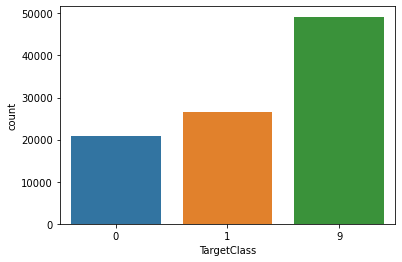

In [25]:
import matplotlib.pyplot as plt # plot graphs
import seaborn as sns # plot graphs

sns.countplot(Stars_Data['TargetClass'])

In [26]:
#Dropping rows that `TargetClass` = 9
Stars_Data = Stars_Data[Stars_Data.TargetClass != 9]

#Reindex the dataframe
Stars_Data = Stars_Data.reset_index(drop=True)

Stars_Data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.27,21.900000,3.10,0.999,K3V,20.972221,0
1,8.06,7.750000,0.97,0.370,F0V,17.506508,0
2,8.55,2.870000,1.11,0.902,G8III,15.839410,1
3,12.31,18.799999,4.99,1.336,M0V:,23.680790,0
4,8.59,10.760000,1.10,0.489,F6V,18.749062,0
...,...,...,...,...,...,...,...
47492,8.79,0.890000,1.28,1.194,K1III,13.536950,1
47493,8.00,0.410000,0.92,0.854,F6Iab,11.063919,1
47494,7.69,6.600000,0.92,1.110,K2III,16.787720,1
47495,6.98,2.970000,0.76,-0.143,B1.5V,14.343782,0


C:\Users\giova\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

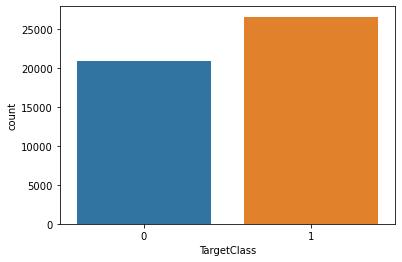

In [27]:
import matplotlib.pyplot as plt # plot graphs
import seaborn as sns # plot graphs

sns.countplot(Stars_Data['TargetClass'])

In [28]:
# Separate the labels
df_giants = Stars_Data[Stars_Data.TargetClass == 1]
df_dwarfs = Stars_Data[Stars_Data.TargetClass == 0]

In [29]:
# Numbers of rows of Giants and Dwarfs
num_of_giant = df_giants.shape[0]
num_of_dwarf = df_dwarfs.shape[0]
print("Giants(1):",num_of_giant)
print("Dwarfs(0):",num_of_dwarf)

Giants(1): 26622
Dwarfs(0): 20875


In [30]:
Stars_Data.to_csv("PreProcess_2Targets_beforeDownSample.csv", index=False)

In [31]:
from sklearn.utils import resample

In [32]:
# Downsample majority class
df_giants_downsampled = resample(df_giants, 
                                 replace=False,    # sample without replacement
                                 n_samples=num_of_dwarf,     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_giants_downsampled, df_dwarfs])

In [33]:
df_downsampled['TargetClass'].value_counts()

1    20875
0    20875
Name: TargetClass, dtype: int64

C:\Users\giova\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

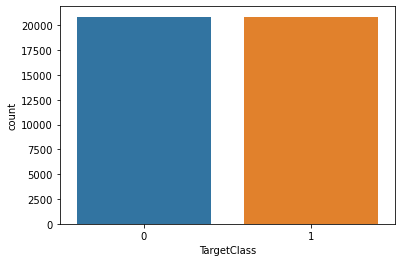

In [34]:
sns.countplot(df_downsampled['TargetClass'])

In [35]:
df_downsampled.describe(include='all')

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,41750.000000,41750.000000,41750.000000,41750.000000,41750,41750.000000,41750.0
unique,NaN,NaN,NaN,NaN,2592,NaN,2.0
top,NaN,NaN,NaN,NaN,K0III,NaN,1.0
freq,NaN,NaN,NaN,NaN,2277,NaN,20875.0
mean,7.988186,8.000642,1.137503,0.664981,NaN,16.380009,NaN
std,1.313107,13.014699,0.848002,0.492755,NaN,2.470164,NaN
min,-0.620000,-27.840000,0.380000,-0.400000,NaN,-0.350000,NaN
25%,7.280000,2.690000,0.810000,0.295000,NaN,15.019853,NaN
50%,8.230000,5.080000,1.000000,0.586000,NaN,16.345833,NaN
75%,8.890000,9.350000,1.260000,1.047000,NaN,18.043604,NaN


In [36]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41750 entries, 4704 to 47495
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         41750 non-null  float32
 1   Plx          41750 non-null  float32
 2   e_Plx        41750 non-null  float32
 3   B-V          41750 non-null  float32
 4   SpType       41750 non-null  object 
 5   Amag         41750 non-null  float32
 6   TargetClass  41750 non-null  object 
dtypes: float32(5), object(2)
memory usage: 1.8+ MB


In [37]:
df_balanced = df_downsampled.reset_index(drop=True)
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41750 entries, 0 to 41749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         41750 non-null  float32
 1   Plx          41750 non-null  float32
 2   e_Plx        41750 non-null  float32
 3   B-V          41750 non-null  float32
 4   SpType       41750 non-null  object 
 5   Amag         41750 non-null  float32
 6   TargetClass  41750 non-null  object 
dtypes: float32(5), object(2)
memory usage: 1.4+ MB


In [38]:
stardf = df_balanced

In [39]:
Stars_Data.to_csv("PreProcess_2Targets_AfterDownSample.csv", index=False)